<a href="https://colab.research.google.com/github/kimberlyydanij/python_demo/blob/master/python_17_selenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Selenium
- "Web Application"의 테스트를 자동화하기 위한 도구이다.
- !pip install selenium
- 참고사이트
  - https://www.selenium.dev/documentation/webdriver/getting_started/upgrade_to_selenium_4/
  - https://wikidocs.net/177133
  - https://kibua20.tistory.com/228


### 구글 드라이브 연결

In [6]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python_demo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/python_demo


### selenium V4

In [7]:
#!pip install selenium

# 특정 버전 설치
#!pip install selenium==4.4.3

#selenium  v4
#!pip install webdriver-manager

#구글코랩 selenium4
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.co

#### import

In [9]:
import requests
from bs4 import BeautifulSoup
import time
from datetime import datetime

from selenium import webdriver

from selenium.webdriver.common.by import By


### selenium 버전별 driver 객체 생성

In [11]:
#selenium V3
#path = './lib/chromedriver.exe'
#driver.get(path)


#selenium V4
#chrome_options = webdriver.ChromeOptions()
#driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))


#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

### Naver에서 id가 1개일때 & 검색어 입력

In [12]:

url = 'https://www.naver.com/'
driver.get(url)


'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/108.0.5359.71 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url"
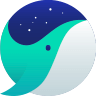
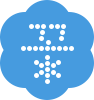

In [13]:
# 크롤링 데이터 확인
driver.page_source